智能推荐系统属于非监督式学习

互联网每天都在产生海量信息，用户行为数据呈现爆发式增长。用户会有直接和明确的需求，但也可能是在漫无目的地搜寻。智能推荐系统可以通过分析用户的浏览次数、浏览时间、点击率等指标，挖掘出用户感兴趣的内容或商品，然后进行个性化推荐。如果推荐的内容或商品能高效匹配用户的需求，就能优化用户体验，提高用户黏性，创造额外收入。智能推荐系统的应用场景极为广泛，例如：当用户看过电影《蜘蛛侠》后，豆瓣电影可能会推荐同为漫威系列的《钢铁侠》；当用户收藏单曲《致爱丽丝》后，网易云音乐可能会推荐同为古典音乐的《梦中的婚礼》；当用户购买机械键盘后，淘宝可能会推荐同为计算机外设产品的蓝牙鼠标。

# 电影智能推荐系统

人们经常会在视频平台上观看电影，有时明确想要观看某部电影，有时则仅仅是随机搜寻。如果视频平台能利用基于物品的智能推荐系统，从用户对观看过的电影给出的评分中有效地挖掘数据，便能根据用户的偏好个性化地推荐更多类似的电影，从而优化用户体验，提高用户黏性，创造额外收入。

本案例将基于皮尔逊相关系数搭建一个电影智能推荐系统。

# 读取数据

本案例的原始数据分为2个部分：
- 第1部分存储在Excel工作簿“电影.xlsx”中，内容为9712部电影的信息，分为“电影编号”“名称”“类别”3列；
- 第2部分存储在Excel工作簿“评分.xlsx”中，内容为这9712部电影的100836条评分，分为“用户编号”“电影编号”“评分”3列。其中“评分”列数据的取值范围为0～5，5为最高分，0为最低分

这些数据来自MovieLens数据集（由明尼苏达大学的GroupLens研究小组整理发布），为方便阅读，笔者对其内容进行了翻译。

In [1]:
import pandas as pd
movies=pd.read_excel('./data/电影.xlsx')
score=pd.read_excel('./data/评分.xlsx')

In [2]:
movies.head()

,电影编号,名称,类别
0,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想
1,2,勇敢者的游戏（1995）,冒险|儿童|幻想
2,3,斗气老顽童2（1995）,喜剧|爱情
3,4,待到梦醒时分（1995）,喜剧|剧情|爱情
4,5,新娘之父2（1995）,喜剧


In [3]:
score.head()

,用户编号,电影编号,评分
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [4]:
df=pd.merge(movies,score,on='电影编号')
df.head()

,电影编号,名称,类别,用户编号,评分
0,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,1,4.0
1,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,5,4.0
2,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,7,4.5
3,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,15,2.5
4,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,17,4.5


# 数据分析

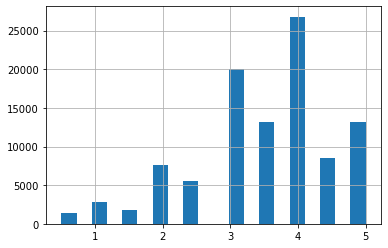

In [5]:
import matplotlib.pyplot as plt
df['评分'].hist(bins=20);

可以看出大部分评分在3、4

In [6]:
ratings=pd.DataFrame(df.groupby('名称')['评分'].mean())
ratings.sort_values('评分',ascending=False).head()

,评分
名称,
假小子（1997）,5.0
福尔摩斯和华生医生历险记：讹诈之王（1980）,5.0
机器人（2016）,5.0
奥斯卡（1967）,5.0
人类状况III（1961）,5.0


In [14]:
ratings['评分次数']=df.groupby('名称')['评分'].count()
ratings.sort_values('评分次数',ascending=False).head()

,评分,评分次数
名称,,
阿甘正传（1994）,4.164134,329
肖申克的救赎（1994）,4.429022,317
低俗小说（1994）,4.197068,307
沉默的羔羊（1991）,4.161290,279
黑客帝国（1999）,4.192446,278


# 数据处理

In [7]:
user_movie=df.pivot_table(index='用户编号',columns='名称',values='评分')
user_movie.head()

名称,007之黄金眼（1995）,100个女孩（2000）,100条街道（2016）,101忠狗续集:伦敦大冒险（2003）,101忠狗（1961）,101雷克雅未克（2000）,102只斑点狗（2000）,10件或更少（2006）,10（1979）,11:14（2003）,...,龙珠：神秘冒险（1988）,龙珠：血红宝石的诅咒（1986）,龙珠：魔鬼城堡中的睡公主（1987）,龙种子（1944）,龙纹身的女孩（2011）,龙舌兰日出（1988）,龙虾（2015）,龙：夜之怒的礼物（2011）,龙：李小龙的故事（1993）,龟日记（1985）
用户编号,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


可以看到，绝大部分评分是NaN，数据透视表显得非常稀疏，这是因为电影数量过于庞大，而每个用户打分的电影数量却很有限

# 系统搭建

以《阿甘正传》为例，分析应该向观看了《阿甘正传》的用户推荐什么样的电影。

In [8]:
FG=user_movie['阿甘正传（1994）']
pd.DataFrame(FG).head()

,阿甘正传（1994）
用户编号,
1,4.0
2,NaN
3,NaN
4,NaN
5,NaN


In [9]:
corr_FG=user_movie.corrwith(FG)
similarity=pd.DataFrame(corr_FG,columns=['相关系数'])
similarity.head()

c:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,相关系数
名称,
007之黄金眼（1995）,0.217441
100个女孩（2000）,NaN
100条街道（2016）,NaN
101忠狗续集:伦敦大冒险（2003）,NaN
101忠狗（1961）,0.141023


没有一个用户同时对这两部电影进行打分，那么就无法计算皮尔逊相关系数中的协方差，导致结果中出现了很多NaN值

In [10]:
# 剔除NAN
similarity.dropna(inplace=True)

In [13]:
ratings.head()

,评分
名称,
007之黄金眼（1995）,3.496212
100个女孩（2000）,3.250000
100条街道（2016）,2.500000
101忠狗续集:伦敦大冒险（2003）,2.500000
101忠狗（1961）,3.431818


In [16]:
similarity_new=pd.merge(similarity,ratings['评分次数'],left_index=True,right_index=True)
# 上同下
# similarity_new=similarity.join(ratings['评分次数'])
similarity_new.head()

,相关系数,评分次数
名称,,
007之黄金眼（1995）,0.217441,132
101忠狗（1961）,0.141023,44
102只斑点狗（2000）,-0.857589,9
10件或更少（2006）,-1.000000,3
11:14（2003）,0.500000,4


因为电影数量庞大，每个用户评过分的电影数量却是有限的，导致许多电影的评分次数很少，所以可能有偶然的因素导致部分电影的评分偏高或偏低，无法反映真实水平。此时需要设置阈值，只有当评分次数大于该阈值时才认为该电影的总体评分有效。这里简单设置阈值为20

In [17]:
similarity_new[similarity_new['评分次数']>20].sort_values(by='相关系数',ascending=False).head()

,相关系数,评分次数
名称,,
阿甘正传（1994）,1.000000,329
抓狂双宝（1996）,0.723238,31
雷神：黑暗世界（2013）,0.715809,21
致命吸引力（1987）,0.701856,36
X战警：未来的日子（2014）,0.682284,30


设置阈值后，与《阿甘正传》的皮尔逊相关系数较高的前4部电影分别是《抓狂双宝》《雷神2：黑暗世界》《致命吸引力》《X战警：逆转未来》。因此，针对原始数据中9712部电影和100836条评分，使用皮尔逊相关系数作为相似度度量的基于物品的协同过滤算法得出的结论是：《阿甘正传》与《抓狂双宝》《雷神2：黑暗世界》《致命吸引力》《X战警：逆转未来》这4部电影相似度最高，可以认为喜欢《阿甘正传》的用户有较大可能也喜欢这4部电影，进而可以向对《阿甘正传》评分很高的用户推荐这4部电影，同样也可以向喜欢这4部电影的用户推荐《阿甘正传》。总体来说，我们通常采用协同过滤算法搭建智能推荐系统，并且在大多数应用场景中偏向于使用基于物品的协同过滤算法，也就是寻找不同物品间的相似性，将相似的物品推荐给用户。智能推荐系统的应用场景非常广泛，感兴趣的读者可以做进一步的研究。